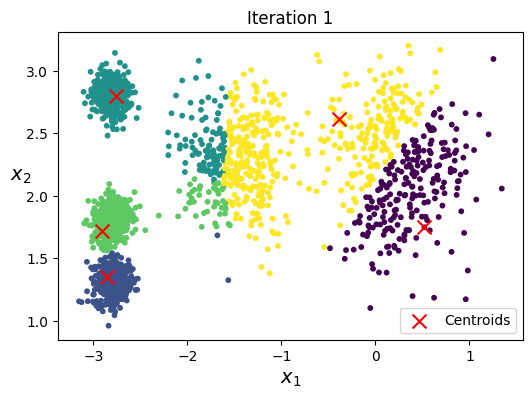

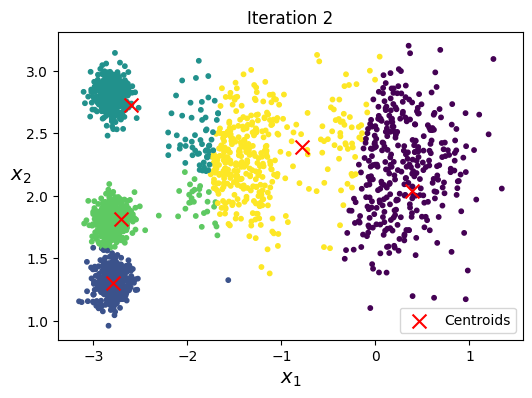

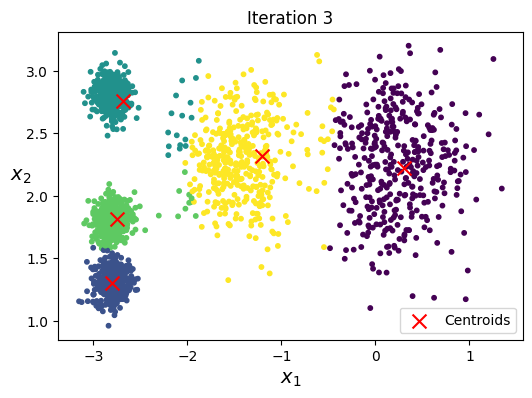

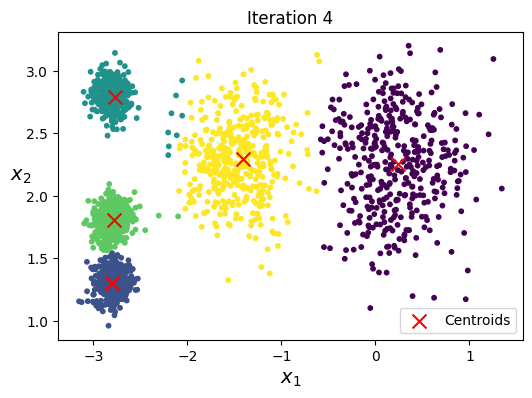

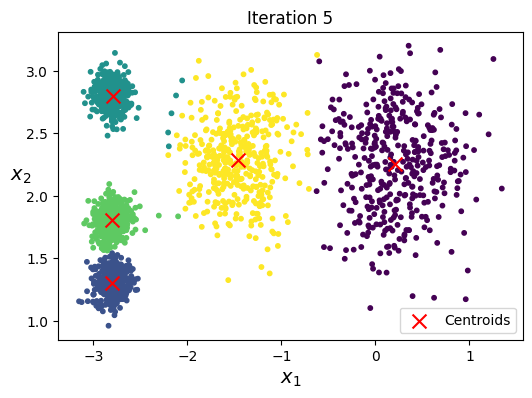

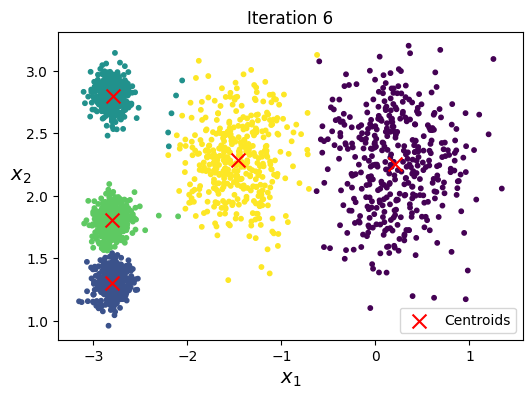

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

blob_centers = np.array([
    [0.2, 2.3],
    [-1.5, 2.3],
    [-2.8, 1.8],
    [-2.8, 2.8],
    [-2.8, 1.3]
])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)


def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=1)

def k_means(X, k, max_iters=10, random_state=42):
    np.random.seed(random_state)

    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for i in range(max_iters):
        labels = np.argmin([euclidean_distance(X, centroid) for centroid in centroids], axis=0)

        plt.figure(figsize=(6, 4))
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis')
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label="Centroids")
        plt.xlabel("$x_1$", fontsize=14)
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
        plt.title(f"Iteration {i + 1}")
        plt.legend()
        plt.show()

        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

k_means(X, k=5, max_iters=10)

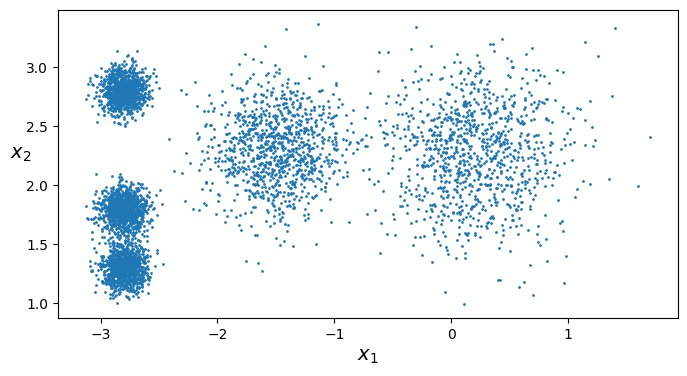

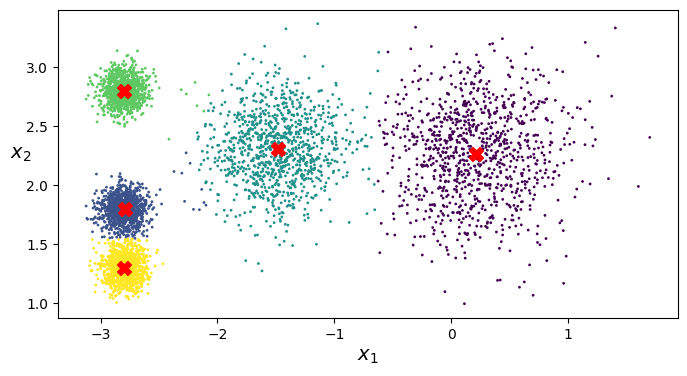

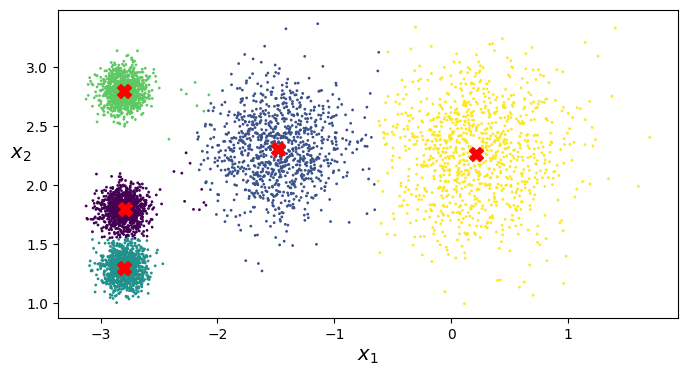

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
blob_centers = np.array(
[[ 0.2, 2.3],
[-1.5 , 2.3],
[-2.8, 1.8],
[-2.8, 2.8],
[-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=5000, centers=blob_centers,
cluster_std=blob_std, random_state=7)
# Plotting
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

from sklearn.cluster import KMeans

def kMeans(k, df):
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(df)
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    return cluster_centers, labels

k = 5
centers, labels = kMeans(k, X)

plt.figure(figsize=(8, 4))
plot_clusters(X, labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X')
plt.show()

def kMeansAlgo(X, k, max_iters=100, tol=1e-4):
    np.random.seed(100)
    random_indices = np.random.choice(len(X), k, replace=False)
    centers = X[random_indices]

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.all(np.linalg.norm(new_centers - centers, axis=1) < tol):
            break

        centers = new_centers

    return centers, labels

    k = 5
centers, labels = kMeansAlgo(X,k)

plt.figure(figsize=(8, 4))
plot_clusters(X, labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X')
plt.show()